#business Questions:



*  How should products be classified into different categories to simplify reports and analysis?
* What is the distribution of product prices across different categories?
* How many products are being discounted?
* How big are the offered discounts as a percentage of the product prices?
* How do seasonality and special dates (Christmas, Black Friday) affect sales?
* How could data collection be improved?





##Reading Data from Google Drive

In [1]:
#import all necessary modules
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
orderlines_qu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chapter_3/Data/quality_assessed data/orderlines_qu.csv')
orders_qu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chapter_3/Data/quality_assessed data/orders_qu.csv')
products_cl=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chapter_3/Data/Cleaned Data/products_cl.csv')
brands_cl=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chapter_3/Data/Cleaned Data/brands_cl.csv')
product_category=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chapter_3/Data/quality_assessed data/products_category.csv')

In [4]:
orderlines_qu.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50


In [5]:
orders_qu.head()

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed


*Questions to cover:*


1.   What is the time period that the dataset covers?

2.   What is the overall revenue for that time?

1.   Are there seasonal patterns in the evolution of sales?
2.   What are the most sold products?

1.   What are the products that generate the most revenue?


#What is the time period that the dataset covers?

In [6]:
orders_qu['created_date']=pd.to_datetime(orders_qu['created_date'])

In [7]:
orders_qu["created_date"].max() - orders_qu["created_date"].min()

Timedelta('437 days 10:12:05')

In [8]:
orders_qu["created_date"].min()

Timestamp('2017-01-01 01:51:47')

In [9]:
orders_qu["created_date"].max()

Timestamp('2018-03-14 12:03:52')

In [10]:
orderlines_qu['date']=pd.to_datetime(orderlines_qu['date'])

In [11]:
orderlines_qu['date'].max() - orderlines_qu['date'].min()


Timedelta('437 days 10:11:57')

In [12]:
#copying the dataframe
orderlines_qu1=orderlines_qu.copy()
orders_qu1=orders_qu.copy()
products_cl1=products_cl.copy()
brands_cl1=brands_cl.copy()
product_category1=product_category.copy()

##the dateset covers from 1st January, 2017 to 14th March, 2018

#What is the overall revenue for that time?

##Ideas about Price
products.price –> this is the original price of a product, without any discount or promotion. (Price before discount)

orderlines.unit_price –> this is the actual price at which a product has been sold. It should roughly match the price in the products table, but there might be deviations, as discounts get applied here. (Price after Discount)

orders.total_paid –> this is the total amount of the full order. It should roughly translate to the sum of all unitary prices, multiplied by the amount of each product purchased (orderlines.product_quantity). The key word here is, again, roughly: the total amount of the order might include shipping costs or vouchers.

###Revenue = Quantity × unit price

To find revenue we have first find discout

In [13]:
orderlines_qu1.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50


In [14]:
products_cl.head()

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364


In [15]:
products_cl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


In [16]:
products_cl1.price.value_counts()

29.99      290
19.99      223
49.99      210
39.99      186
34.99      171
          ... 
543.00       1
332.99       1
1618.29      1
1218.29      1
519.00       1
Name: price, Length: 2332, dtype: int64

In [17]:
products_cl1.price.describe() #products price maximum is 15339 which looks not normal at this stage

count     9992.000000
mean       667.346268
std       1365.540546
min          2.990000
25%         42.990000
50%        112.990000
75%        660.695000
max      15339.000000
Name: price, dtype: float64

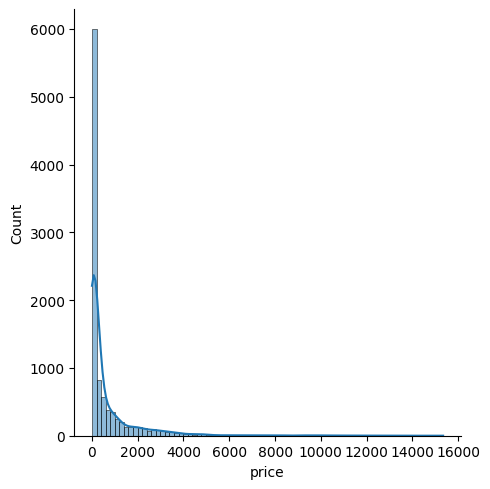

In [18]:
sns.displot(data=products_cl1,
            x="price",
            binwidth=200,
            kde=True);
#because of the maximum price 15339. the distribution is not clear, products data frame
#need to be further cleaned,
#take till 4000 euro, as the distribution are till 4000 euro

In [19]:
orderlines_qu1.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50


In [20]:
orderlines_qu1.shape

(53231, 7)

In [21]:
products_cl1.shape

(9992, 6)

In [22]:
#orderlines_qu1_group_sku_df = orderlines_qu1.groupby("sku", as_index=False)["unit_price"].sum()

In [23]:
#orderlines_qu1_group_sku_df.head()

In [24]:
discount_df = products_cl1.merge(orderlines_qu1, left_on="sku", right_on="sku")
discount_df.head()

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25


products.price - orderlines.unit_price = discount

**price before discount - price after discount = discount**



In [25]:
pd.set_option("display.max_rows", 1000)
pd.set_option('display.max_colwidth',120)

In [26]:
discount_df["Discount"] = discount_df["price"] - discount_df["unit_price"]
#discount_df.head(10)
discount_df.tail(10)

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,Discount
53221,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1530170,478578,0,1,19.54,2018-01-01 17:31:58,10.45
53222,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1573942,496040,0,1,19.99,2018-01-22 13:11:08,10.00
53223,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1595210,503929,0,1,22.99,2018-02-01 19:13:42,7.00
53224,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1597029,504708,0,1,22.99,2018-02-02 23:04:20,7.00
53225,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1493542,461718,0,1,22.99,2017-12-13 12:03:38,7.00
53226,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1499671,464365,0,1,22.99,2017-12-16 14:38:57,7.00
53227,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1523146,475426,0,1,19.54,2017-12-28 20:24:02,10.45
53228,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1559235,490325,0,2,22.99,2018-01-13 23:08:33,7.00
53229,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1596455,496812,0,1,22.99,2018-02-02 14:23:53,7.00
53230,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-inch end of 2016 thanks to the foam LRPu,29.99,1,13835403,1614075,511623,0,1,22.99,2018-02-14 17:39:42,7.00


In [27]:
discount_df.Discount.describe()

count    53231.000000
mean        26.116673
std         45.545881
min       -170.990000
25%          5.250000
50%         15.000000
75%         31.000000
max       1320.000000
Name: Discount, dtype: float64

the min discount -170 and max discount 1320 seems to be abnormal, we want to check these two data

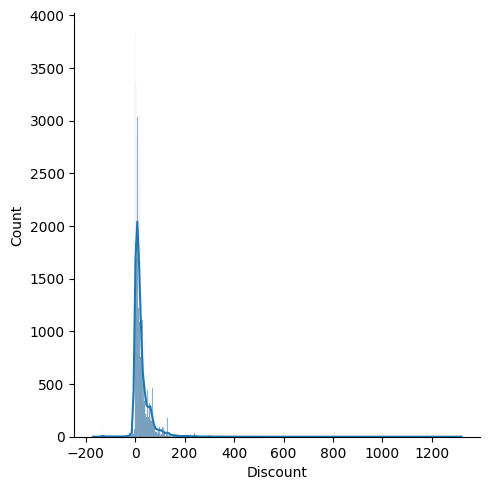

In [28]:
sns.displot(data=discount_df,
            x="Discount",
            kde=True);

In [29]:
discount_df.loc[discount_df['Discount']==1320,:]

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,Discount
42255,PAC2067,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz | 4GB RAM | 500GB HDD",Computer Refurbished iMac 24 inch Core 2 Duo 28GHz | 4GB RAM | 500GB HDD,1799.0,0,1282,1303519,382526,0,1,479.0,2017-07-26 19:41:00,1320.0


*ok , second hand refurbished product, so it got 1320 discount, sounds normal now*

In [30]:
discount_df.loc[discount_df['Discount']==-170.99,:]

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,Discount
36958,LAC0179,12TB LaCie 2big Thunderbolt 2,Dual RAID disk box 12TB Thunderbolt 2 for Mac and PC,719.0,0,11935397,1133288,304102,0,1,889.99,2017-01-07 10:13:51,-170.99
36959,LAC0179,12TB LaCie 2big Thunderbolt 2,Dual RAID disk box 12TB Thunderbolt 2 for Mac and PC,719.0,0,11935397,1140339,306995,0,1,889.99,2017-01-11 01:05:52,-170.99


###calculating discount percentage

In [31]:
discount_df['disc_percenatge']=((discount_df['Discount']/discount_df['price'])*100).round(2)

In [32]:
discount_df.head(2)

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,Discount,disc_percenatge
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,5.0,8.33
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,10.0,16.67


In [49]:
discount_df1=discount_df.loc[discount_df['disc_percenatge']>=0,:]

KeyError: 'disc_percentage'

In [33]:
from google.colab import files

discount_df.to_csv("discount.csv", index=False)
files.download("discount.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloaded the CSV file discount

In [34]:
product_category1.head()

,sku,name,desc,price,in_stock,type,category,brand
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,other,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,other,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,other,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,other,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1,1364,Mac RAM,KIN


#What is the distribution of product discounts across different categories?

In [46]:
#created a table that consists product category and discount precentage
discount_category = product_category1.merge(discount_df, on='sku').loc[:,('category','disc_percenatge')]


In [48]:
discount_category.disc_percenatge.describe()

count    53231.000000
mean        21.377940
std         18.145655
min       -212.270000
25%          9.090000
50%         17.650000
75%         28.590000
max         97.140000
Name: disc_percenatge, dtype: float64

In [ ]:
discount_category.disc_percenatge.describe()

In [44]:
discount_category.nlargest(10,'disc_percenatge')

,category,disc_percenatge
52849,External Battery,97.14
53018,External Battery,94.45
53042,External Battery,94.45
53052,External Battery,94.45
52795,External Battery,94.30
52797,External Battery,94.30
52798,External Battery,94.30
52804,External Battery,94.30
52806,External Battery,94.30
52819,External Battery,94.30


**External Battery recives the Highest amount of discount 97.14%**


In [43]:
discount_category.nsmallest(10,'disc_percenatge')

,category,disc_percenatge
25829,other,-212.27
25830,other,-212.27
25831,other,-212.27
44204,Accessories,-81.34
21683,Mac RAM,-61.34
44903,Repair service,-58.34
44905,Repair service,-58.34
21682,Mac RAM,-54.74
5133,Repair service,-50.01
38858,Repair service,-50.01


**other categories ( which we have not categorized) recieves samllest -212.27% which is negative means customer pays more 212.27%
we can take only positve value to show the actual discount**

It is a question why thunderbolt 2 is sold more 170.99 euro than its actual price, but for now we will keep as it is

Another way to find revenue is summing up total paid

In [32]:
total_revenue=orders_qu1.agg({'total_paid':'sum'})
total_revenue

total_paid    7978675.6
dtype: float64

#Toltal Revenue 7.97 Million

#Are there seasonal patterns in the evolution of sales?

In [ ]:
orders_qu1.head()

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed


In [ ]:
(
    orders_qu1
    .resample('M', on='created_date')['order_id']
    .count()

)

created_date
2017-01-31    4597
2017-02-28    2045
2017-03-31     163
2017-04-30    1460
2017-05-31    1651
2017-06-30    1329
2017-07-31    3074
2017-08-31    2098
2017-09-30    1880
2017-10-31    2768
2017-11-30    6261
2017-12-31    4863
2018-01-31    4511
2018-02-28    2931
2018-03-31    1354
Freq: M, Name: order_id, dtype: int64

#we can see sales drops in March, 2017, again increases July, 2017. Then the rise in sale can be seen in November, 2017 and December and next year January, 2018 (Christmas gives a rise in sale)

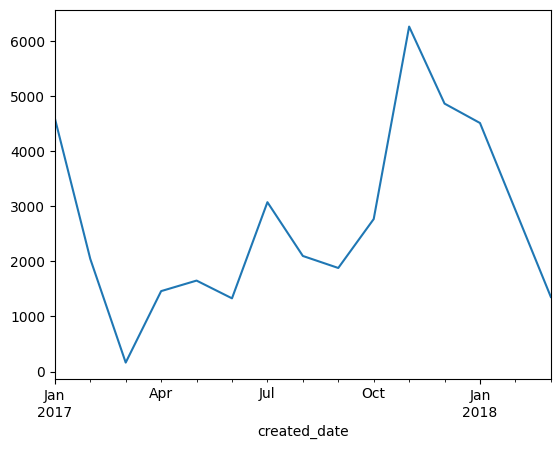

In [ ]:
#monthly sales plotting
(
    orders_qu1
    .resample('M', on='created_date')['order_id']
    .count()
    .plot()
);

In [ ]:
#monthly revenue calculate
(
    orders_qu1
    .resample('M', on='created_date')['total_paid']
    .sum()

)

created_date
2017-01-31     620623.31
2017-02-28     341848.26
2017-03-31      24976.81
2017-04-30     230994.54
2017-05-31     333930.28
2017-06-30     292248.33
2017-07-31     610519.07
2017-08-31     385907.56
2017-09-30     395974.90
2017-10-31     558111.08
2017-11-30    1527976.98
2017-12-31    1007358.85
2018-01-31     880716.06
2018-02-28     539254.42
2018-03-31     228235.15
Freq: M, Name: total_paid, dtype: float64

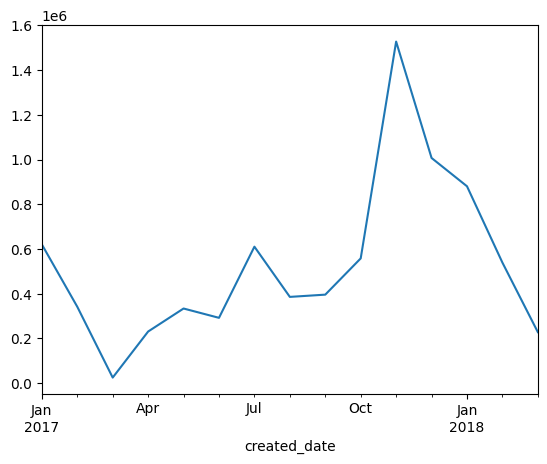

In [ ]:
#monthly revenue calculate
(
    orders_qu1
    .resample('M', on='created_date')['total_paid']
    .sum()
    .plot()
);

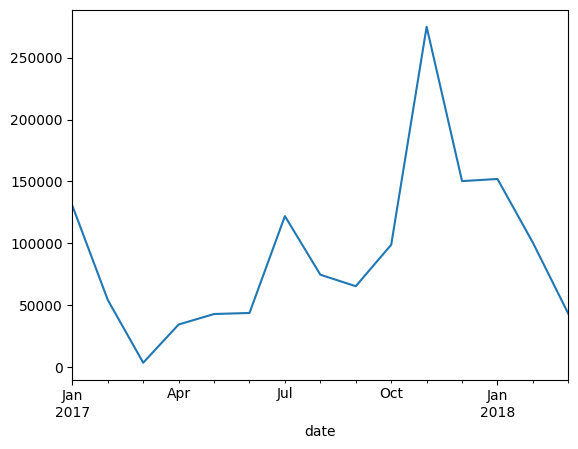

In [ ]:
#discount plotting
(
    discount_df
    .resample('M', on='date')['Discount']
    .sum()
    .plot()
);

monthly revenue  follows the same pattern as sales, revenue drop in march, increases in July, 2017 and again the rise can be seen in November, December

In [ ]:
(
    orders_qu1
    .resample('M', on='created_date')
    .agg({'order_id':'count', 'total_paid':'sum'})
    #.plot(kind='scatter', x='order_id', y='total_paid')
)

,order_id,total_paid
created_date,,
2017-01-31,4597,620623.31
2017-02-28,2045,341848.26
2017-03-31,163,24976.81
2017-04-30,1460,230994.54
2017-05-31,1651,333930.28
2017-06-30,1329,292248.33
2017-07-31,3074,610519.07
2017-08-31,2098,385907.56
2017-09-30,1880,395974.90


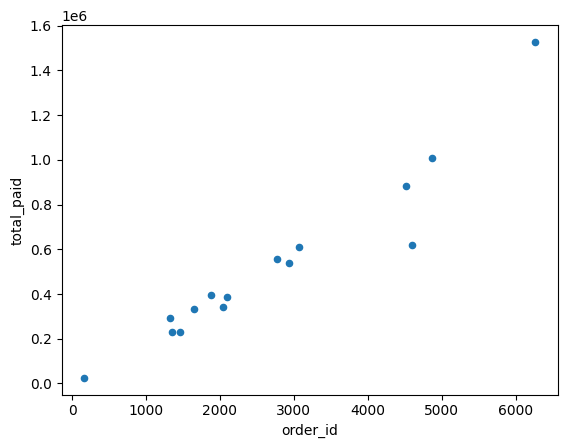

In [ ]:
import matplotlib.pyplot as plt



(
    orders_qu1
    .resample('M', on='created_date')
    .agg({'order_id':'count', 'total_paid':'sum'})
    .plot(kind='scatter', x='order_id', y='total_paid')
);


#the correlation between orders and revenue: (revenue grows whenever discounts increase.)


#  What are the most sold products?


In [ ]:
discount_df.head()

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,Discount
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,5.0
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,10.0
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39,10.0
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16,5.0
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25,5.0


In [ ]:
(
     discount_df
     .groupby(['sku','name'])
     .agg({'product_quantity':'sum'})
     .nlargest(10, 'product_quantity')
)

,,product_quantity
sku,name,
APP1190,IPhone AppleCare Protection Plan,955
APP0698,Apple Lightning Cable Connector to USB 1m White (OEM),820
APP1922,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,537
APP0927,EarPods Apple Headphones with Remote and Mic (OEM),489
WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",476
SAM0074,Samsung 850 EVO SSD Disk 500GB,329
CRU0051,Crucial MX300 525GB SSD Disk,328
APP2446,Apple iPhone 6 32GB Space Gray,270
NTE0013,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",252


#IPhone AppleCare Protection Plan	has the most sold products

#What are the products that generate the most revenue?


In [ ]:
discount_df['total_price'] = discount_df['product_quantity'] * (discount_df['unit_price'])

In [ ]:
discount_df.head()

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,Discount,total_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,5.0,54.99
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,10.0,49.99
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39,10.0,49.99
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16,5.0,54.99
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25,5.0,54.99


In [ ]:
(
     discount_df
     .groupby(['sku','name'])
     .agg({'total_price':'sum'})
     .nlargest(10, 'total_price')
)

,,total_price
sku,name,
LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",135375.83
APP2446,Apple iPhone 6 32GB Space Gray,104560.64
APP1922,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,86473.26
APP2477,Apple iPhone 64GB Space Gray 8,85301.93
APP1970,Apple iPhone 32GB Space Gray,80715.76
APP2072,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM | 128GB SSD",74964.06
APP2485,Apple iPhone 8 Plus 64GB Gold,70721.79
WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",65589.96
APP2483,Apple iPhone 8 Plus 64GB Space Gray,60090.08


#LG 27UD88-W Monitor 27 "UHD 4K USB 3.0 USB-C	 generates most revenue

<Axes: xlabel='sku'>

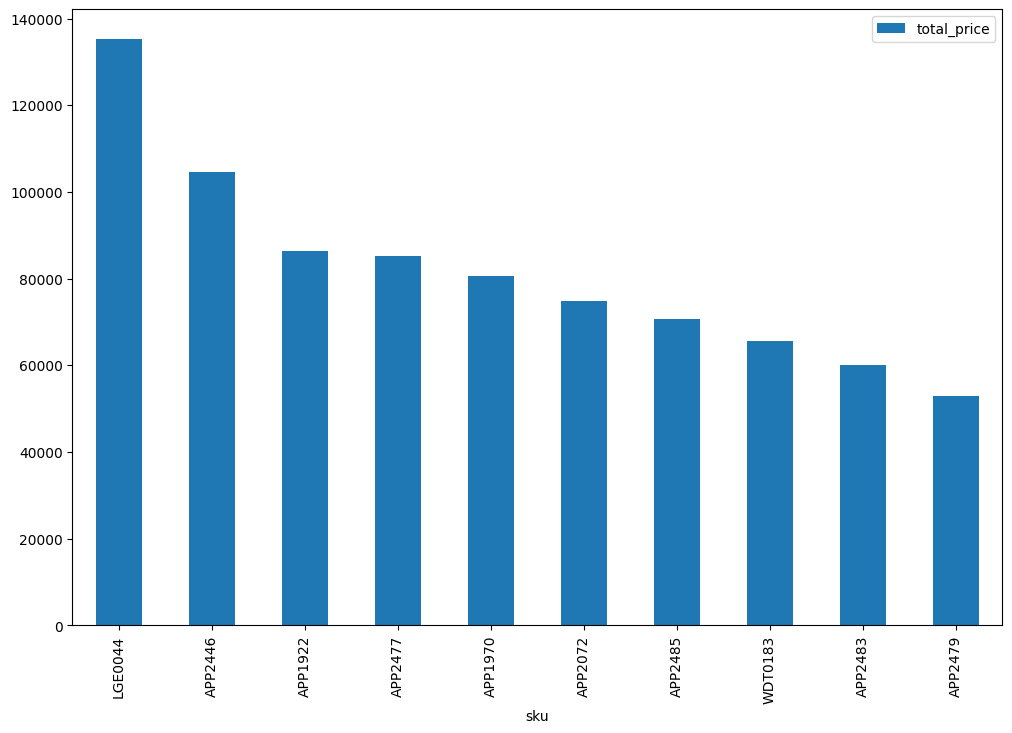

In [ ]:
(
     discount_df
     .groupby(['sku'])
     .agg({'total_price':'sum'})
     .nlargest(10, 'total_price')
     .plot(kind='bar', figsize=(12,8))
)